In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import io
import numpy as np
import time # Import the time module

# ***`Bài 1: SNAP`***

In [ ]:

def download_and_read_data():
  """
    Tải và đọc dữ liệu từ mạng xã hội Facebook (từ SNAP)
  """
  url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
  response = urllib.request.urlopen(url)
  data = response.read()

  df = pd.read_csv(io.BytesIO(data),
                   compression='gzip',
                   sep=" ",
                   names=["source", "target"])
  return df

In [ ]:
def calculate_all_metrics(G):
  """
    Tính toán tất cả các số đo của đồ thị
    Args:
        G: Đồ thị NetworkX
    Returns:
        dict: Dictionary chứa các số đo của đồ thị
  """
  metrics = {}
  # 1. Thông tin cơ bản
  metrics['nodes'] = G.number_of_nodes()
  # |V|: Số lượng đỉnh trong đồ thị

  metrics['edges'] = G.number_of_edges()
  # |E|: Số lượng cạnh trong đồ thị

  metrics['density'] = nx.density(G)
  # Mật độ đồ thị
  # Công thức: D = 2|E| / (|V|(|V|-1))
  # Trong đó:
  # - |E|: số cạnh thực tế
  # - |V|(|V|-1): số cạnh tối đa có thể có trong đồ thị vô hướng

  metrics['average_degree'] = np.mean([d for n, d in G.degree()])

  # 2. Degree metrics
  degrees = dict(G.degree())
  metrics['avg_degree'] = sum(degrees.values()) / len(degrees)
  # Degree trung bình
  # Công thức: <k> = (1/|V|) * Σ ki
  # Trong đó:
  # - |V|: số lượng đỉnh
  # - ki: degree của đỉnh i
  # Note: Trong đồ thị vô hướng: <k> = 2|E|/|V|

  metrics['max_degree'] = max(degrees.values())
  metrics['degrees'] = degrees

  # 3. Degree Centrality
  dc = nx.degree_centrality(G)
  metrics['degree_centrality'] = {
      'values': dc,
      'max': max(dc.values()),
      'avg': sum(dc.values()) / len(dc),
      'node_max': max(dc, key=dc.get)
  }
  # Degree Centrality
  # Công thức: CD(v) = deg(v)/(|V|-1)
  # Trong đó:
  # - deg(v): degree của đỉnh v
  # - |V|-1: số lượng kết nối tối đa có thể có của một đỉnh

  # 4. Betweenness Centrality
  bc = nx.betweenness_centrality(G)
  metrics['betweenness_centrality'] = {
      'values': bc,
      'max': max(bc.values()),
      'avg': sum(bc.values()) / len(bc),
      'node_max': max(bc, key=bc.get)
  }
  # Betweenness Centrality
  # Công thức: CB(v) = Σ (σst(v)/σst)
  # Trong đó:
  # - σst: số đường đi ngắn nhất từ đỉnh s đến đỉnh t
  # - σst(v): số đường đi ngắn nhất từ s đến t đi qua v
  # - Tổng được tính trên mọi cặp đỉnh s,t khác v

  # 5. Closeness Centrality
  cc = nx.closeness_centrality(G)
  metrics['closeness_centrality'] = {
      'values': cc,
      'max': max(cc.values()),
      'avg': sum(cc.values()) / len(cc),
      'node_max': max(cc, key=cc.get)
  }
  # Closeness Centrality
  # Công thức: CC(v) = (|V|-1) / Σ d(v,u)
  # Trong đó:
  # - |V|-1: số đỉnh khác v
  # - d(v,u): độ dài đường đi ngắn nhất từ v đến u
  # - Tổng được tính trên mọi đỉnh u khác v

  # 6. PageRank
  pr = nx.pagerank(G, alpha=0.85)
  metrics['pagerank'] = {
      'values': pr,
      'max': max(pr.values()),
      'avg': sum(pr.values()) / len(pr),
      'node_max': max(pr, key=pr.get)
  }
  # PageRank
  # Công thức: PR(v) = (1-d) + d * Σ (PR(u)/OutDegree(u))
  # Trong đó:
  # - d: damping factor (thường = 0.85)
  # - PR(u): PageRank của các đỉnh u kề với v
  # - OutDegree(u): bậc ra của đỉnh u
  # - Tổng được tính trên mọi đỉnh u kề với v

  return metrics

In [ ]:
def print_detailed_results(metrics):
  """
  In kết quả chi tiết của các phép đo
  """
  print("\n======== PHÂN TÍCH MẠNG XÃ HỘI ========= ")
  print("1. Thông tin cơ bản")
  print(f"- Số lượng nodes (người dùng): {metrics['nodes']}")
  print(f"- Số lượng cạnh (kết nối): {metrics['edges']}")
  print(f"- Mật độ: {metrics['density']}")
  print(f"- Degree trung bình: {metrics['average_degree']}")
  print(f"- Degree lớn nhất: {metrics['max_degree']}")

  centrality_measures = {
        'Degree Centrality': 'degree_centrality',
        'Betweenness Centrality': 'betweenness_centrality',
        'Closeness Centrality': 'closeness_centrality',
        'PageRank': 'pagerank'
    }

  print("2. Các số đo Centrality")
  for name, measure in centrality_measures.items():
    print(f"- {name}")
    print(f"- Giá trị lớn nhất: {metrics[measure]['max']:.4f}")
    print(f"- Giá trị trung bình: {metrics[measure]['avg']:.4f}")
    print(f"- Node có giá trị cao nhất: {metrics[measure]['node_max']}")

In [ ]:
def plot_metrics(metrics):
    # Vẽ đồ thị các chỉ số
    fig, axs = plt.subplots(2, 3, figsize=(10, 8))
    metrics_list = ['degrees', 'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']
    titles = ['Degree', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'PageRank']

    for i, metric in enumerate(metrics_list):
        ax = axs[i//3, i%3]
        values = metrics[metric]['values'] if metric != 'degrees' else metrics['degrees']
        ax.hist(list(values.values()), bins=50, color='skyblue', edgecolor='black')
        ax.set_title(titles[i])
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

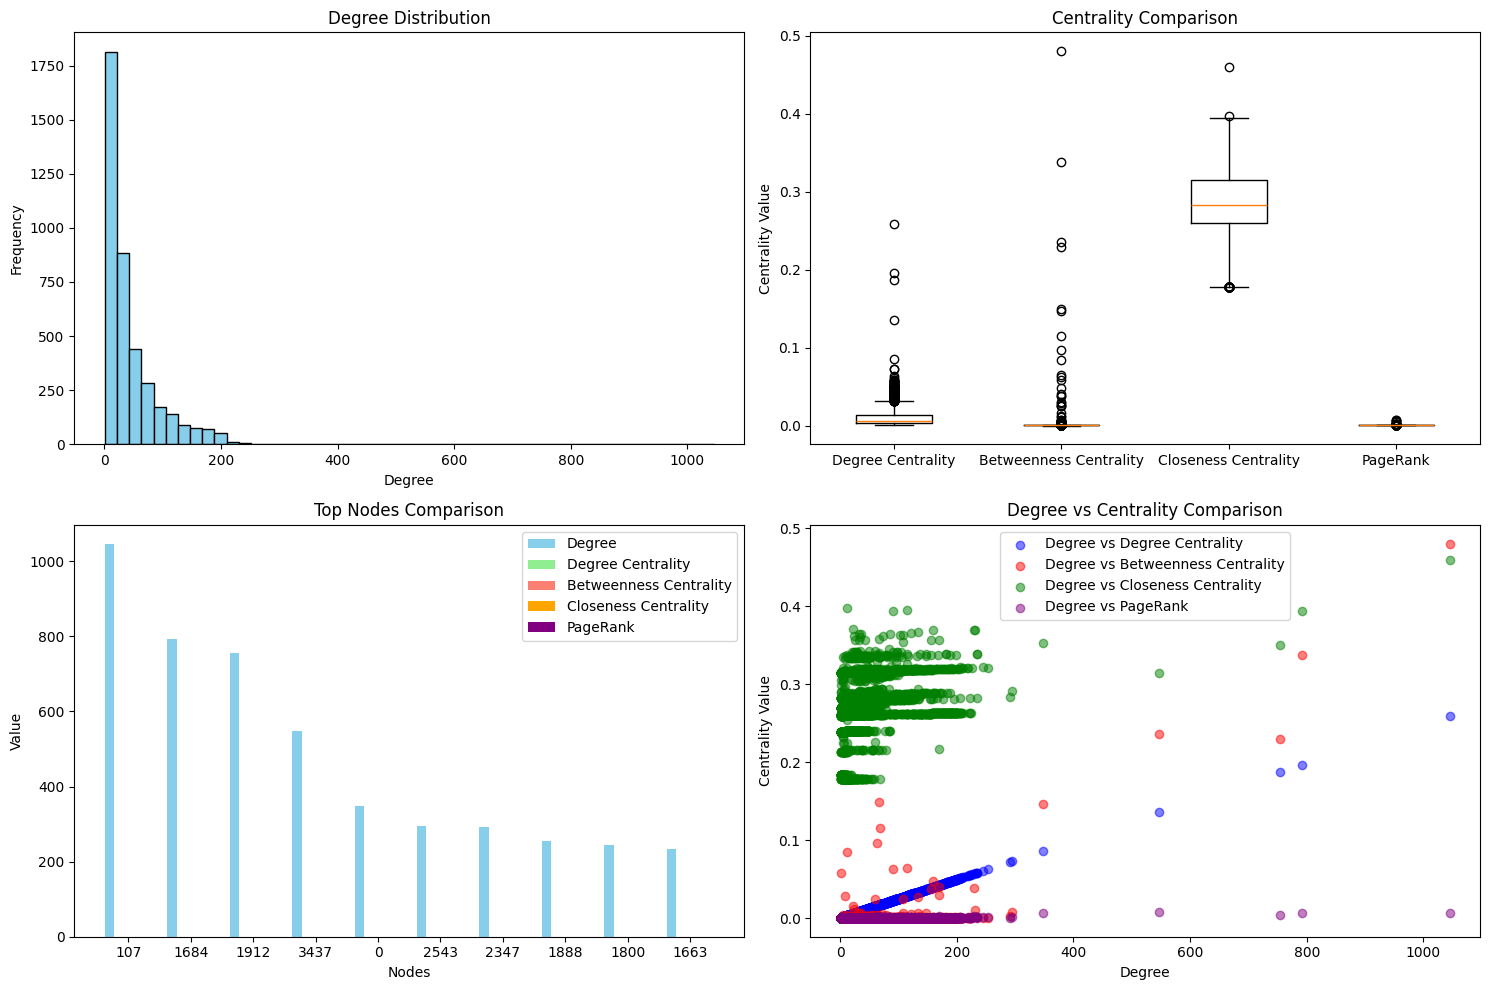

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_metrics(G, metrics):
    """
    Trực quan hóa các số đo của đồ thị
    Args:
        G: Đồ thị NetworkX
        metrics: Dictionary chứa các số đo của đồ thị
    """
    # Tạo figure với 2x2 subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Degree Distribution
    ax = axs[0, 0]
    degree_values = list(metrics['degrees'].values())
    ax.hist(degree_values, bins=50, color='skyblue', edgecolor='black')
    ax.set_title('Degree Distribution')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')

    # 2. Centrality Comparison
    ax = axs[0, 1]
    centrality_measures = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']
    centrality_values = [
        list(metrics['degree_centrality']['values'].values()),
        list(metrics['betweenness_centrality']['values'].values()),
        list(metrics['closeness_centrality']['values'].values()),
        list(metrics['pagerank']['values'].values())
    ]

    ax.boxplot(centrality_values, labels=['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'PageRank'])
    ax.set_title('Centrality Comparison')
    ax.set_ylabel('Centrality Value')

    # 3. Top Nodes Comparison
    ax = axs[1, 0]
    top_n = 10  # Số lượng node hàng đầu
    top_degree_nodes = sorted(metrics['degrees'].items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_dc_nodes = sorted(metrics['degree_centrality']['values'].items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_bc_nodes = sorted(metrics['betweenness_centrality']['values'].items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_cc_nodes = sorted(metrics['closeness_centrality']['values'].items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_pr_nodes = sorted(metrics['pagerank']['values'].items(), key=lambda x: x[1], reverse=True)[:top_n]

    top_nodes = {
        'Degree': [x[0] for x in top_degree_nodes],
        'Degree Centrality': [x[0] for x in top_dc_nodes],
        'Betweenness Centrality': [x[0] for x in top_bc_nodes],
        'Closeness Centrality': [x[0] for x in top_cc_nodes],
        'PageRank': [x[0] for x in top_pr_nodes]
    }

    top_values = {
        'Degree': [x[1] for x in top_degree_nodes],
        'Degree Centrality': [x[1] for x in top_dc_nodes],
        'Betweenness Centrality': [x[1] for x in top_bc_nodes],
        'Closeness Centrality': [x[1] for x in top_cc_nodes],
        'PageRank': [x[1] for x in top_pr_nodes]
    }

    bar_width = 0.15
    index = np.arange(top_n)

    ax.bar(index, top_values['Degree'], bar_width, label='Degree', color='skyblue')
    ax.bar(index + bar_width, top_values['Degree Centrality'], bar_width, label='Degree Centrality', color='lightgreen')
    ax.bar(index + 2*bar_width, top_values['Betweenness Centrality'], bar_width, label='Betweenness Centrality', color='salmon')
    ax.bar(index + 3*bar_width, top_values['Closeness Centrality'], bar_width, label='Closeness Centrality', color='orange')
    ax.bar(index + 4*bar_width, top_values['PageRank'], bar_width, label='PageRank', color='purple')

    ax.set_title('Top Nodes Comparison')
    ax.set_xlabel('Nodes')
    ax.set_ylabel('Value')
    ax.set_xticks(index + 2*bar_width)
    ax.set_xticklabels(top_nodes['Degree'])
    ax.legend()

    # 4. Degree vs Centrality (Scatter Plot)
    ax = axs[1, 1]
    degree_centrality_values = list(metrics['degree_centrality']['values'].values())
    betweenness_centrality_values = list(metrics['betweenness_centrality']['values'].values())
    closeness_centrality_values = list(metrics['closeness_centrality']['values'].values())
    pagerank_values = list(metrics['pagerank']['values'].values())

    ax.scatter(degree_values, degree_centrality_values, label='Degree vs Degree Centrality', alpha=0.5, color='blue')
    ax.scatter(degree_values, betweenness_centrality_values, label='Degree vs Betweenness Centrality', alpha=0.5, color='red')
    ax.scatter(degree_values, closeness_centrality_values, label='Degree vs Closeness Centrality', alpha=0.5, color='green')
    ax.scatter(degree_values, pagerank_values, label='Degree vs PageRank', alpha=0.5, color='purple')

    ax.set_title('Degree vs Centrality Comparison')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Centrality Value')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Ví dụ sử dụng
df = download_and_read_data()
G = nx.from_pandas_edgelist(df, "source", "target")
metrics = calculate_all_metrics(G)

# Gọi phương thức visualize_metrics để trực quan hóa các số đo
visualize_metrics(G, metrics)



======== PHÂN TÍCH MẠNG XÃ HỘI ========= 
1. Thông tin cơ bản
- Số lượng nodes (người dùng): 4039
- Số lượng cạnh (kết nối): 88234
- Mật độ: 0.010819963503439287
- Degree trung bình: 43.69101262688784
- Degree lớn nhất: 1045
2. Các số đo Centrality
- Degree Centrality
- Giá trị lớn nhất: 0.2588
- Giá trị trung bình: 0.0108
- Node có giá trị cao nhất: 107
- Betweenness Centrality
- Giá trị lớn nhất: 0.4805
- Giá trị trung bình: 0.0007
- Node có giá trị cao nhất: 107
- Closeness Centrality
- Giá trị lớn nhất: 0.4597
- Giá trị trung bình: 0.2762
- Node có giá trị cao nhất: 107
- PageRank
- Giá trị lớn nhất: 0.0076
- Giá trị trung bình: 0.0002
- Node có giá trị cao nhất: 3437


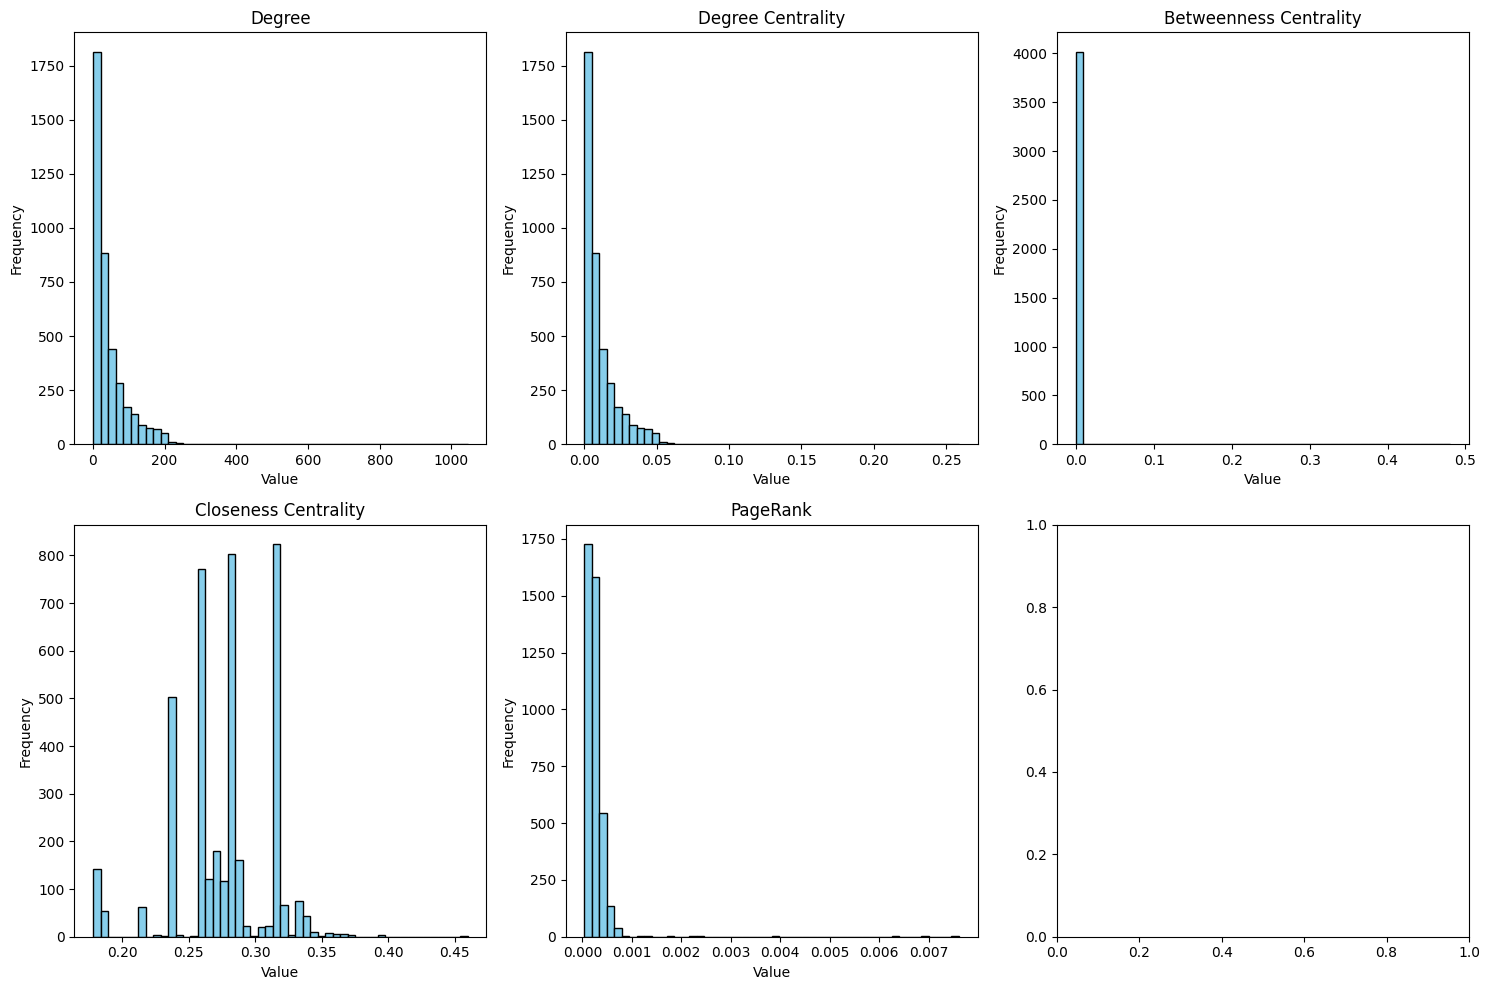

In [ ]:
  # Tải dữ liệu và tạo đồ thị
df = download_and_read_data()
df.head()
G = nx.from_pandas_edgelist(df, "source", "target")
# metrics = calculate_all_metrics(G)
print_detailed_results(metrics)
plot_metrics(metrics)


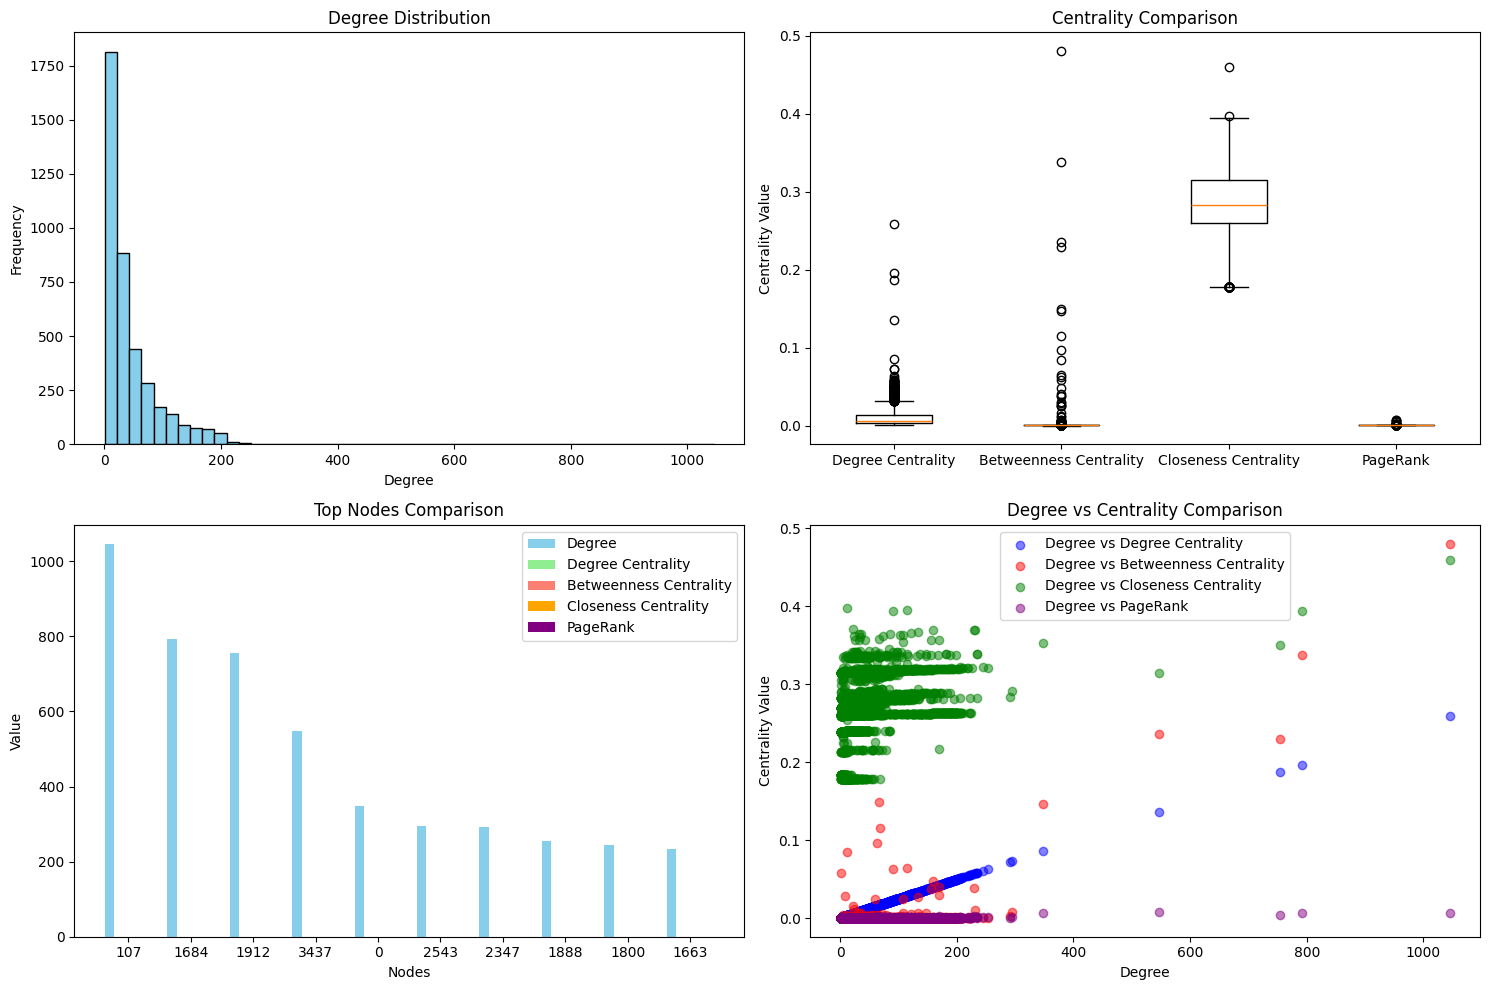

In [ ]:
# plot_metrics(metrics)
visualize_metrics(G, metrics)

# ***`Bài 2: Network Repository`***

In [ ]:
def download_and_read_data():
    """
    Tải và đọc dữ liệu mạng các trang Facebook về thực phẩm
    Returns:
        DataFrame: Chứa các cạnh của đồ thị
    """
    print("Đang tải dữ liệu Facebook Food Pages Network...")

    # URL của dataset
    url = "https://nrvis.com/download/data/soc/fb-pages-food.zip"

    try:
        # Tải dữ liệu
        response = requests.get(url)
        if response.status_code == 200:
            # Đọc file zip
            z = zipfile.ZipFile(io.BytesIO(response.content))

            # Đọc dữ liệu từ file trong zip
            df = pd.read_csv(z.open('fb-pages-food.edges'),
                           sep=' ',
                           names=['source', 'target'])
            return df
        else:
            raise Exception("Không thể tải dữ liệu")
    except Exception as e:
        print(f"Lỗi khi tải dữ liệu: {e}")
        return None

In [ ]:
def analyze_network(G):
    """
    Phân tích đặc trưng của mạng các trang Facebook
    Args:
        G: Đồ thị NetworkX
    Returns:
        dict: Các số đo của mạng
    """
    metrics = {}

    # 1. Thông tin cơ bản
    print("\nĐang tính toán thông tin cơ bản...")
    metrics['nodes'] = G.number_of_nodes()  # Số lượng trang
    metrics['edges'] = G.number_of_edges()  # Số lượng liên kết
    metrics['density'] = nx.density(G)      # Mật độ liên kết

    # 2. Degree Analysis
    print("Đang tính toán degree metrics...")
    start_time = time.time()
    degrees = dict(G.degree())
    metrics['avg_degree'] = np.mean(list(degrees.values()))
    metrics['max_degree'] = max(degrees.values())
    metrics['degrees'] = degrees
    print(f"Thời gian tính Degree metrics: {time.time() - start_time:.2f}s")

    # 3. Degree Centrality
    print("Đang tính toán Degree Centrality...")
    start_time = time.time()
    dc = nx.degree_centrality(G)
    metrics['degree_centrality'] = {
        'values': dc,
        'max': max(dc.values()),
        'avg': sum(dc.values()) / len(dc),
        'top_pages': sorted(dc.items(), key=lambda x: x[1], reverse=True)[:10]
    }
    print(f"Thời gian tính Degree Centrality: {time.time() - start_time:.2f}s")

    # 4. Betweenness Centrality
    print("Đang tính toán Betweenness Centrality...")
    start_time = time.time()
    bc = nx.betweenness_centrality(G)
    metrics['betweenness_centrality'] = {
        'values': bc,
        'max': max(bc.values()),
        'avg': sum(bc.values()) / len(bc),
        'top_pages': sorted(bc.items(), key=lambda x: x[1], reverse=True)[:10]
    }
    print(f"Thời gian tính Betweenness Centrality: {time.time() - start_time:.2f}s")

    # 5. Closeness Centrality
    print("Đang tính toán Closeness Centrality...")
    start_time = time.time()
    cc = nx.closeness_centrality(G)
    metrics['closeness_centrality'] = {
        'values': cc,
        'max': max(cc.values()),
        'avg': sum(cc.values()) / len(cc),
        'top_pages': sorted(cc.items(), key=lambda x: x[1], reverse=True)[:10]
    }
    print(f"Thời gian tính Closeness Centrality: {time.time() - start_time:.2f}s")

    # 6. PageRank
    print("Đang tính toán PageRank...")
    start_time = time.time()
    pr = nx.pagerank(G, alpha=0.85)
    metrics['pagerank'] = {
        'values': pr,
        'max': max(pr.values()),
        'avg': sum(pr.values()) / len(pr),
        'top_pages': sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]
    }
    print(f"Thời gian tính PageRank: {time.time() - start_time:.2f}s")

    return metrics

In [ ]:
def print_results(metrics):
    """
    In kết quả phân tích
    """
    print("\nKẾT QUẢ PHÂN TÍCH MẠNG FACEBOOK FOOD PAGES")
    print("=" * 50)

    print("\n1. THÔNG TIN CƠ BẢN")
    print("-" * 30)
    print(f"Số lượng trang: {metrics['nodes']:,}")
    print(f"Số lượng liên kết: {metrics['edges']:,}")
    print(f"Mật độ mạng: {metrics['density']:.6f}")
    print(f"Số liên kết trung bình/trang: {metrics['avg_degree']:.2f}")
    print(f"Số liên kết nhiều nhất: {metrics['max_degree']}")

    print("\n2. PHÂN TÍCH CENTRALITY")
    centrality_measures = {
        'Degree Centrality': 'degree_centrality',
        'Betweenness Centrality': 'betweenness_centrality',
        'Closeness Centrality': 'closeness_centrality',
        'PageRank': 'pagerank'
    }

    for name, measure in centrality_measures.items():
        print(f"\n{name}:")
        print(f"- Giá trị trung bình: {metrics[measure]['avg']:.6f}")
        print(f"- Giá trị lớn nhất: {metrics[measure]['max']:.6f}")
        print("\nTop 5 trang có giá trị cao nhất:")
        for page, score in metrics[measure]['top_pages'][:5]:
            print(f"Page {page}: {score:.6f}")


In [ ]:
# Tải dữ liệu
edges_df = download_and_read_data()

# Tạo đồ thị có hướng
print("Đang tạo đồ thị...")
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', create_using=nx.DiGraph())

Đang tải dữ liệu Facebook Food Pages Network...
Đang tạo đồ thị...


In [ ]:
# Phân tích mạng
metrics = analyze_network(G)


Đang tính toán thông tin cơ bản...
Đang tính toán degree metrics...
Thời gian tính Degree metrics: 0.00s
Đang tính toán Degree Centrality...
Thời gian tính Degree Centrality: 0.00s
Đang tính toán Betweenness Centrality...
Thời gian tính Betweenness Centrality: 32.81s
Đang tính toán Closeness Centrality...
Thời gian tính Closeness Centrality: 0.07s
Đang tính toán PageRank...
Thời gian tính PageRank: 0.01s


In [ ]:
# In kết quả
print_results(metrics)


KẾT QUẢ PHÂN TÍCH MẠNG FACEBOOK FOOD PAGES

1. THÔNG TIN CƠ BẢN
------------------------------
Số lượng trang: 4,204
Số lượng liên kết: 2,102
Mật độ mạng: 0.000119
Số liên kết trung bình/trang: 1.00
Số liên kết nhiều nhất: 1

2. PHÂN TÍCH CENTRALITY

Degree Centrality:
- Giá trị trung bình: 0.000238
- Giá trị lớn nhất: 0.000238

Top 5 trang có giá trị cao nhất:
Page 0,276: 0.000238
Page nan: 0.000238
Page 0,58: 0.000238
Page nan: 0.000238
Page 0,132: 0.000238

Betweenness Centrality:
- Giá trị trung bình: 0.000000
- Giá trị lớn nhất: 0.000000

Top 5 trang có giá trị cao nhất:
Page 0,276: 0.000000
Page nan: 0.000000
Page 0,58: 0.000000
Page nan: 0.000000
Page 0,132: 0.000000

Closeness Centrality:
- Giá trị trung bình: 0.000119
- Giá trị lớn nhất: 0.000238

Top 5 trang có giá trị cao nhất:
Page nan: 0.000238
Page nan: 0.000238
Page nan: 0.000238
Page nan: 0.000238
Page nan: 0.000238

PageRank:
- Giá trị trung bình: 0.000238
- Giá trị lớn nhất: 0.000309

Top 5 trang có giá trị cao nhất:

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def visualize_metrics(G, metrics):
    """
    Trực quan hóa các số đo của đồ thị mạng Facebook Food Pages.
    Args:
        G: Đồ thị NetworkX.
        metrics: Dictionary chứa các số đo của đồ thị.
    """
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # 1. Degree Distribution
    ax = axs[0, 0]
    degree_values = list(metrics['degrees'].values())
    ax.hist(degree_values, bins=50, color='skyblue', edgecolor='black')
    ax.set_title('Degree Distribution')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')

    # 2. Centrality Comparison (Boxplot)
    ax = axs[0, 1]
    centrality_measures = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']
    centrality_values = [
        list(metrics['degree_centrality']['values'].values()),
        list(metrics['betweenness_centrality']['values'].values()),
        list(metrics['closeness_centrality']['values'].values()),
        list(metrics['pagerank']['values'].values())
    ]

    ax.boxplot(centrality_values, labels=['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'PageRank'])
    ax.set_title('Centrality Comparison')
    ax.set_ylabel('Centrality Value')

    # 3. Top Pages Comparison (Bar Chart)
    ax = axs[1, 0]
    top_n = 10
    top_degree_nodes = sorted(metrics['degree_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_dc_nodes = sorted(metrics['degree_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_bc_nodes = sorted(metrics['betweenness_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_cc_nodes = sorted(metrics['closeness_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_pr_nodes = sorted(metrics['pagerank']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]

    top_nodes = {
        'Degree': [x[0] for x in top_degree_nodes],
        'Degree Centrality': [x[0] for x in top_dc_nodes],
        'Betweenness Centrality': [x[0] for x in top_bc_nodes],
        'Closeness Centrality': [x[0] for x in top_cc_nodes],
        'PageRank': [x[0] for x in top_pr_nodes]
    }

    top_values = {
        'Degree': [x[1] for x in top_degree_nodes],
        'Degree Centrality': [x[1] for x in top_dc_nodes],
        'Betweenness Centrality': [x[1] for x in top_bc_nodes],
        'Closeness Centrality': [x[1] for x in top_cc_nodes],
        'PageRank': [x[1] for x in top_pr_nodes]
    }

    bar_width = 0.15
    index = np.arange(top_n)

    ax.bar(index, top_values['Degree'], bar_width, label='Degree', color='skyblue')
    ax.bar(index + bar_width, top_values['Degree Centrality'], bar_width, label='Degree Centrality', color='lightgreen')
    ax.bar(index + 2*bar_width, top_values['Betweenness Centrality'], bar_width, label='Betweenness Centrality', color='salmon')
    ax.bar(index + 3*bar_width, top_values['Closeness Centrality'], bar_width, label='Closeness Centrality', color='orange')
    ax.bar(index + 4*bar_width, top_values['PageRank'], bar_width, label='PageRank', color='purple')

    ax.set_title('Top Pages Comparison')
    ax.set_xlabel('Pages')
    ax.set_ylabel('Centrality Value')
    ax.set_xticks(index + 2*bar_width)
    ax.set_xticklabels(top_nodes['Degree'])
    ax.legend()

    # 4. Degree vs Centrality (Scatter Plot)
    ax = axs[1, 1]
    degree_centrality_values = list(metrics['degree_centrality']['values'].values())
    betweenness_centrality_values = list(metrics['betweenness_centrality']['values'].values())
    closeness_centrality_values = list(metrics['closeness_centrality']['values'].values())
    pagerank_values = list(metrics['pagerank']['values'].values())

    ax.scatter(degree_values, degree_centrality_values, label='Degree vs Degree Centrality', alpha=0.5, color='blue')
    ax.scatter(degree_values, betweenness_centrality_values, label='Degree vs Betweenness Centrality', alpha=0.5, color='red')
    ax.scatter(degree_values, closeness_centrality_values, label='Degree vs Closeness Centrality', alpha=0.5, color='green')
    ax.scatter(degree_values, pagerank_values, label='Degree vs PageRank', alpha=0.5, color='purple')

    ax.set_title('Degree vs Centrality Comparison')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Centrality Value')
    ax.legend()

    plt.tight_layout()
    plt.show()

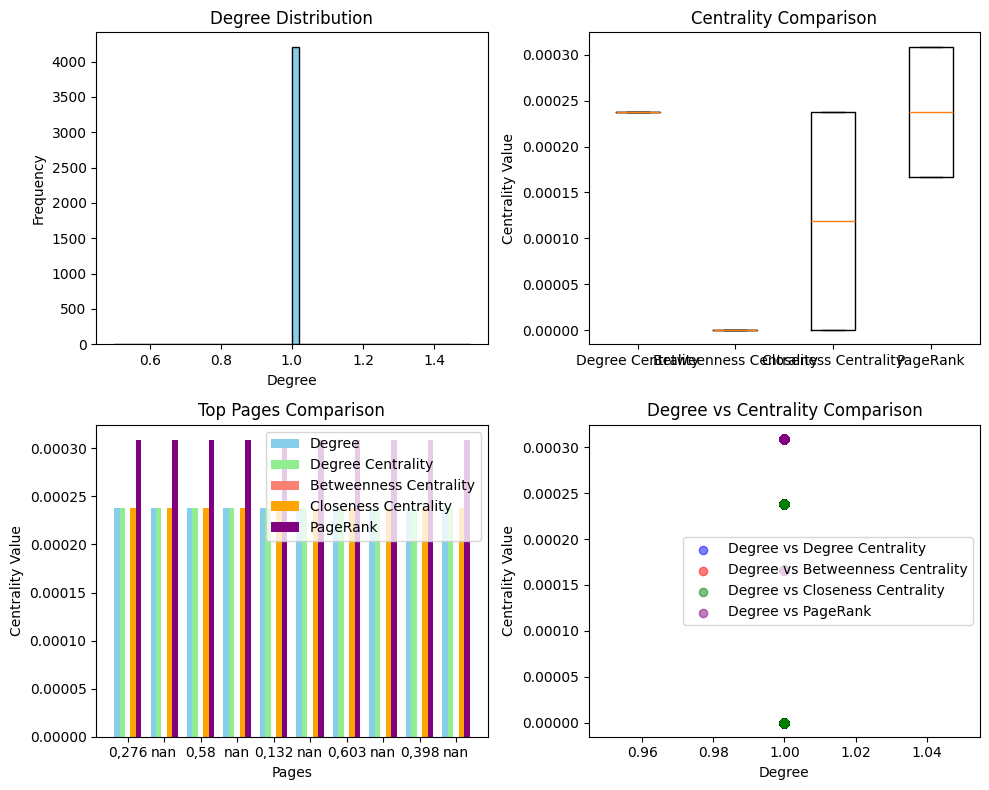

In [ ]:

# Gọi phương thức visualize_metrics để trực quan hóa các số đo
visualize_metrics(G, metrics)


# ***`Bài 3`***

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tarfile
import io
import time
from collections import Counter

class NetworkAnalyzer:
    def __init__(self):
        """Khởi tạo class NetworkAnalyzer"""
        self.data = None
        self.graph = None
        self.metrics = {}

    def download_and_read_data(self, url=None):
        """
        Tải và đọc dữ liệu từ KONECT
        Args:
            url: URL của dataset (tùy chọn)
        Returns:
            DataFrame: Chứa thông tin về các cạnh
        """
        if url is None:
            url = "http://konect.cc/files/download.tsv.dblp_coauthor.tar.bz2"

        print("Đang tải và đọc dữ liệu...")

        try:
            response = requests.get(url)
            if response.status_code == 200:
                tar = tarfile.open(fileobj=io.BytesIO(response.content), mode='r:bz2')
                data_file = [f for f in tar.getmembers() if f.name.endswith('out.dblp_coauthor')][0]
                data_content = tar.extractfile(data_file).read().decode('utf-8')

                # Đọc dữ liệu từng dòng
                rows = []
                skipped = 0
                for line in data_content.split('\n'):
                    if line and not line.startswith('%'):
                        try:
                            # Tách dòng thành các phần
                            parts = line.strip().split()
                            if len(parts) >= 4:  # Kiểm tra có đủ 4 cột
                                author1 = int(parts[0])
                                author2 = int(parts[1])
                                weight = float(parts[2])
                                timestamp = int(parts[3])

                                rows.append({
                                    'author1': author1,
                                    'author2': author2,
                                    'weight': weight,
                                    'timestamp': timestamp
                                })
                            else:
                                skipped += 1
                                print(f"Dòng thiếu dữ liệu: {line}")

                        except (ValueError, IndexError) as e:
                            skipped += 1
                            print(f"Lỗi xử lý dòng: {line} - {str(e)}")
                            continue

                # Tạo DataFrame
                df = pd.DataFrame(rows)

                # In thông tin kiểm tra
                print(f"\nKết quả đọc dữ liệu:")
                print(f"- Số cạnh đã đọc thành công: {len(df):,}")
                print(f"- Số dòng bị bỏ qua: {skipped:,}")
                print("\nMẫu dữ liệu:")
                print(df.head())
                print("\nThông tin các cột:")
                print(df.dtypes)
                print("\nThống kê:")
                print(df.describe())

                tar.close()
                self.data = df
                return True

            else:
                raise Exception(f"Lỗi khi tải dữ liệu: Status code {response.status_code}")
        except Exception as e:
            print(f"Lỗi: {str(e)}")
            return False

    def create_graph(self):
        """Tạo đồ thị từ DataFrame"""
        if self.data is None:
            print("Chưa có dữ liệu để tạo đồ thị")
            return False

        print("Đang tạo đồ thị...")
        try:
            # Chỉ sử dụng các cột cần thiết cho đồ thị
            self.graph = nx.from_pandas_edgelist(
                self.data,
                'author1',
                'author2',
                edge_attr=['weight', 'timestamp'],  # Thêm timestamp vào thuộc tính cạnh
                create_using=nx.Graph()
            )

            print(f"Đã tạo đồ thị với {self.graph.number_of_nodes():,} nodes và "
                  f"{self.graph.number_of_edges():,} edges")
            return True

        except Exception as e:
            print(f"Lỗi khi tạo đồ thị: {str(e)}")
            return False

    def analyze_network(self):
        """Phân tích các đặc trưng của mạng"""
        if self.graph is None:
            print("Chưa có đồ thị để phân tích")
            return False

        print("\nĐang phân tích mạng...")

        # 1. Thông tin cơ bản
        start_time = time.time()
        self.metrics['nodes'] = self.graph.number_of_nodes()
        self.metrics['edges'] = self.graph.number_of_edges()
        self.metrics['density'] = nx.density(self.graph)
        print(f"Thời gian tính thông tin cơ bản: {time.time() - start_time:.2f}s")

        # 2. Degree metrics
        start_time = time.time()
        degrees = dict(self.graph.degree())
        weighted_degrees = {
            node: sum(dict(self.graph[node]).values())
            for node in self.graph.nodes()
        }

        self.metrics['degrees'] = degrees
        self.metrics['weighted_degrees'] = weighted_degrees
        self.metrics['avg_degree'] = np.mean(list(degrees.values()))
        self.metrics['max_degree'] = max(degrees.values())
        self.metrics['avg_weighted_degree'] = np.mean(list(weighted_degrees.values()))
        self.metrics['max_weighted_degree'] = max(weighted_degrees.values())
        print(f"Thời gian tính degree metrics: {time.time() - start_time:.2f}s")

        # 3. Centrality measures
        # Degree Centrality
        start_time = time.time()
        dc = nx.degree_centrality(self.graph)
        self.metrics['degree_centrality'] = {
            'values': dc,
            'max': max(dc.values()),
            'avg': np.mean(list(dc.values())),
            'top': sorted(dc.items(), key=lambda x: x[1], reverse=True)[:10]
        }
        print(f"Thời gian tính Degree Centrality: {time.time() - start_time:.2f}s")

        # Betweenness Centrality
        start_time = time.time()
        bc = nx.betweenness_centrality(self.graph)
        self.metrics['betweenness_centrality'] = {
            'values': bc,
            'max': max(bc.values()),
            'avg': np.mean(list(bc.values())),
            'top': sorted(bc.items(), key=lambda x: x[1], reverse=True)[:10]
        }
        print(f"Thời gian tính Betweenness Centrality: {time.time() - start_time:.2f}s")

        # Closeness Centrality
        start_time = time.time()
        cc = nx.closeness_centrality(self.graph)
        self.metrics['closeness_centrality'] = {
            'values': cc,
            'max': max(cc.values()),
            'avg': np.mean(list(cc.values())),
            'top': sorted(cc.items(), key=lambda x: x[1], reverse=True)[:10]
        }
        print(f"Thời gian tính Closeness Centrality: {time.time() - start_time:.2f}s")

        # PageRank
        start_time = time.time()
        pr = nx.pagerank(self.graph)
        self.metrics['pagerank'] = {
            'values': pr,
            'max': max(pr.values()),
            'avg': np.mean(list(pr.values())),
            'top': sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]
        }
        print(f"Thời gian tính PageRank: {time.time() - start_time:.2f}s")

        return True

    def print_results(self):
        """In kết quả phân tích"""
        if not self.metrics:
            print("Chưa có kết quả phân tích")
            return

        print("\nKẾT QUẢ PHÂN TÍCH MẠNG ĐỒNG TÁC GIẢ")
        print("=" * 50)

        # 1. Thông tin cơ bản
        print("\n1. THÔNG TIN CƠ BẢN")
        print("-" * 30)
        print(f"Số lượng tác giả: {self.metrics['nodes']:,}")
        print(f"Số lượng cộng tác: {self.metrics['edges']:,}")
        print(f"Mật độ mạng: {self.metrics['density']:.6f}")
        print(f"Degree trung bình: {self.metrics['avg_degree']:.2f}")
        print(f"Degree lớn nhất: {self.metrics['max_degree']}")
        print(f"Weighted degree trung bình: {self.metrics['avg_weighted_degree']:.2f}")
        print(f"Weighted degree lớn nhất: {self.metrics['max_weighted_degree']}")

        # 2. Centrality Measures
        centrality_measures = {
            'Degree Centrality': 'degree_centrality',
            'Betweenness Centrality': 'betweenness_centrality',
            'Closeness Centrality': 'closeness_centrality',
            'PageRank': 'pagerank'
        }

        print("\n2. CENTRALITY MEASURES")
        print("-" * 30)
        for name, measure in centrality_measures.items():
            print(f"\n{name}:")
            print(f"- Giá trị trung bình: {self.metrics[measure]['avg']:.6f}")
            print(f"- Giá trị lớn nhất: {self.metrics[measure]['max']:.6f}")
            print("\nTop 5 tác giả:")
            for author, score in self.metrics[measure]['top'][:5]:
                print(f"  {author}: {score:.6f}")


def main():
    # Khởi tạo analyzer
    analyzer = NetworkAnalyzer()

    # Tải và đọc dữ liệu
    if not analyzer.download_and_read_data():
        return

    # Tạo đồ thị
    if not analyzer.create_graph():
        return

     # Phân tích mạng
    if not analyzer.analyze_network():
        return

    # In và trực quan hóa kết quả
    analyzer.print_results()

if __name__ == "__main__":
    main()

Đang tải và đọc dữ liệu...
